Brute Force Colors: 6


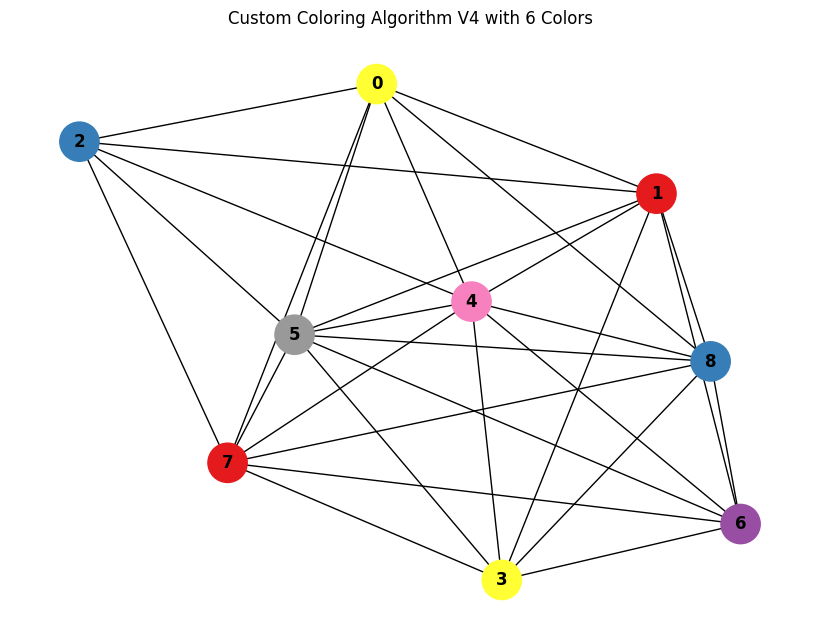

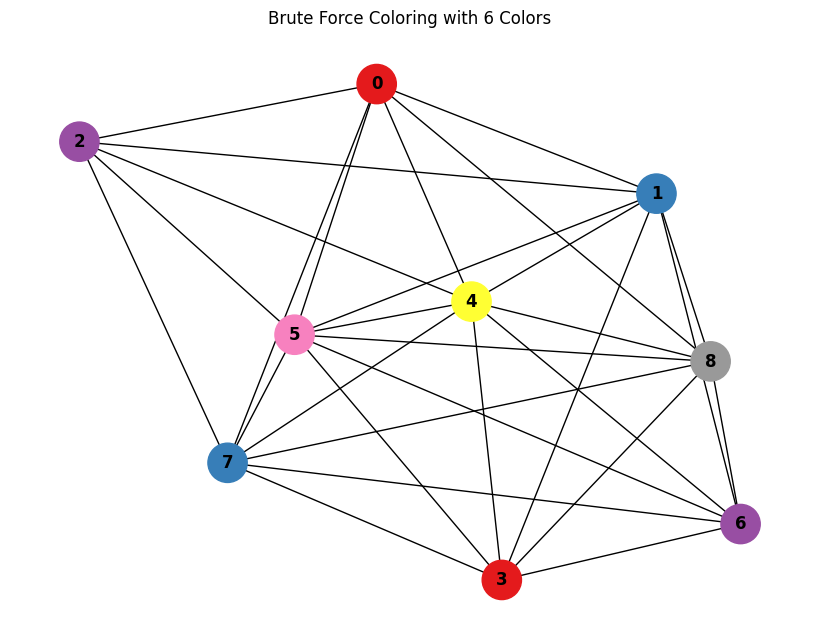

{'Version 4 Colors': 5,
 'Version 4 Time': 0.0009591579437255859,
 'Brute Force Colors': 5,
 'Brute Force Time': 1.2561242580413818,
 'Brute Force Coloring': {0: 0,
  1: 1,
  2: 2,
  3: 1,
  4: 2,
  5: 3,
  6: 4,
  7: 1,
  8: 4},
 'alog1': {'Version 4 Colors': 6,
  'algo1 colors': {0: 3, 8: 1, 7: 0, 6: 2, 5: 5, 4: 4, 3: 3, 1: 0, 2: 1},
  'Version 4 Time': 0.0009868144989013672,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.630593061447144,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 2,
   3: 0,
   4: 3,
   5: 4,
   6: 2,
   7: 1,
   8: 5}},
 'algo2': {'Version 4 Colors': 6,
  'Version 4 Time': 0.00043654441833496094,
  'Brute Force Colors': 6,
  'Brute Force Time': 9.42982029914856,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 0,
   3: 2,
   4: 3,
   5: 1,
   6: 4,
   7: 2,
   8: 5}},
 'algo3': {'Version 4 Colors': 6,
  'Version 4 Time': 0.0009729862213134766,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.660520076751709,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2:

In [135]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4(G):
    # Step 1: Initial 2-Color Subgraph Coloring
    color_map = {}
    current_color = 0

    for node in G.nodes:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    color_map[current_node] = current_color
                    # Enqueue non-adjacent nodes
                    for neighbor in G.neighbors(current_node):
                        if neighbor not in color_map:
                            to_color.append(neighbor)
            # Alternate between two colors
            current_color = 1 - current_color

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map[edge[0]], color_map[edge[1]], color_map[u]}
                remaining_color = available_colors - assigned_colors
                if len(remaining_color) > 0:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Ensure adjacent nodes have different colors with influence from adjacent colors
    for node in G.nodes:
        used_colors = {color_map[neighbor] for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map[node] in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

def is_valid_coloring(G, coloring):
    """Check if the given coloring is valid (i.e., no two adjacent nodes have the same color)."""
    for u, v in G.edges:
        if coloring[u] == coloring[v]:
            return False
    return True

def brute_force_coloring(G):
    """Brute-force approach to find the minimum coloring of the graph."""
    # Get nodes
    nodes = list(G.nodes)
    n = len(nodes)
    
    # Try all color assignments
    for k in range(1, n + 1):
        for coloring in itertools.product(range(k), repeat=n):
            coloring_dict = dict(zip(nodes, coloring))
            if is_valid_coloring(G, coloring_dict):
                return coloring_dict, k
    return None, n  # Fallback in case no valid coloring is found


# Create a test graph
G = nx.erdos_renyi_graph(9, 0.8) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results["alog1"] = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "algo1 colors":color_map_v4,
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results





results


In [136]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4_1(G):
    # Step 1: Initial 2-Color Subgraph Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    remaining_colors = available_colors - adjacent_colors
                    if remaining_colors:
                        new_color = remaining_colors.pop()
                    else:
                        # If no color is available, assign a new color
                        new_color = len(available_colors)
                        available_colors.add(new_color)

                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.neighbors(current_node):
                        if neighbor not in color_map:
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if remaining_color:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Ensure adjacent nodes have different colors
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map.get(node) in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

# Create a test graph
#G = nx.erdos_renyi_graph(7, 0.5) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4_1(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results["algo2"] = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results


Brute Force Colors: 6


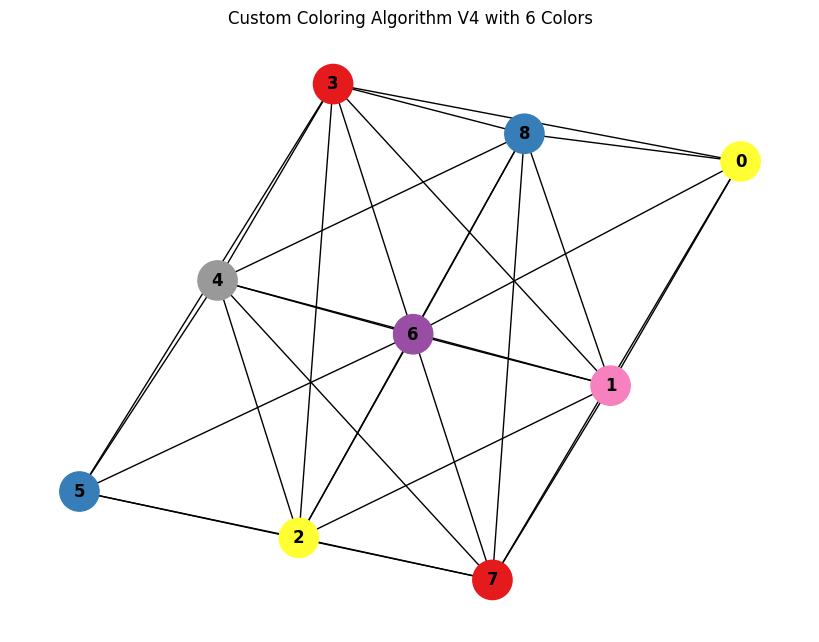

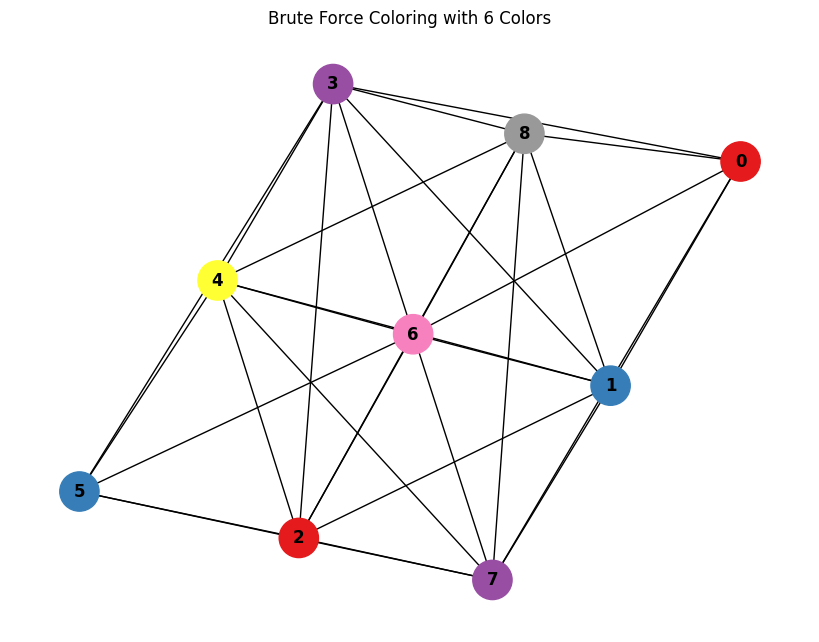

{'Version 4 Colors': 5,
 'Version 4 Time': 0.0009591579437255859,
 'Brute Force Colors': 5,
 'Brute Force Time': 1.2561242580413818,
 'Brute Force Coloring': {0: 0,
  1: 1,
  2: 2,
  3: 1,
  4: 2,
  5: 3,
  6: 4,
  7: 1,
  8: 4},
 'alog1': {'Version 4 Colors': 6,
  'algo1 colors': {0: 3, 8: 1, 7: 0, 6: 2, 5: 1, 4: 5, 3: 0, 2: 3, 1: 4},
  'Version 4 Time': 0.00046753883361816406,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.169639825820923,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 0,
   3: 2,
   4: 3,
   5: 1,
   6: 4,
   7: 2,
   8: 5}},
 'algo2': {'Version 4 Colors': 6,
  'Version 4 Time': 0.00043654441833496094,
  'Brute Force Colors': 6,
  'Brute Force Time': 9.42982029914856,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 0,
   3: 2,
   4: 3,
   5: 1,
   6: 4,
   7: 2,
   8: 5}},
 'algo3': {'Version 4 Colors': 6,
  'Version 4 Time': 0.0009729862213134766,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.660520076751709,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4(G):
    # Step 1: Initial Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    remaining_colors = available_colors - adjacent_colors
                    if remaining_colors:
                        new_color = remaining_colors.pop()
                    else:
                        # If no color is available, assign a new color
                        new_color = len(available_colors)
                        available_colors.add(new_color)

                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.nodes:
                        if neighbor not in color_map and neighbor not in G.neighbors(current_node):
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if remaining_color:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Ensure adjacent nodes have different colors
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map.get(node) in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

# Create a test graph
#G = nx.erdos_renyi_graph(7, 0.5) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results["algo3"] = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results


Brute Force Colors: 6


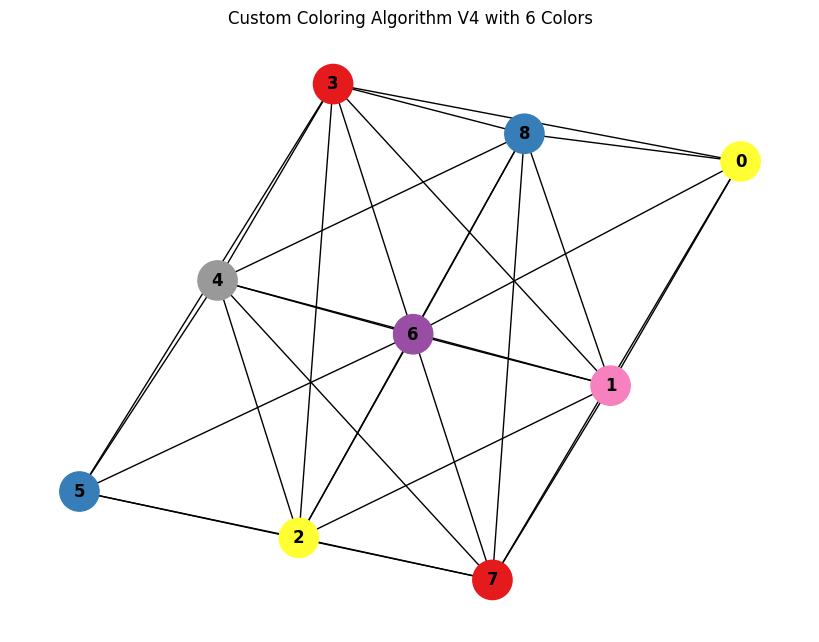

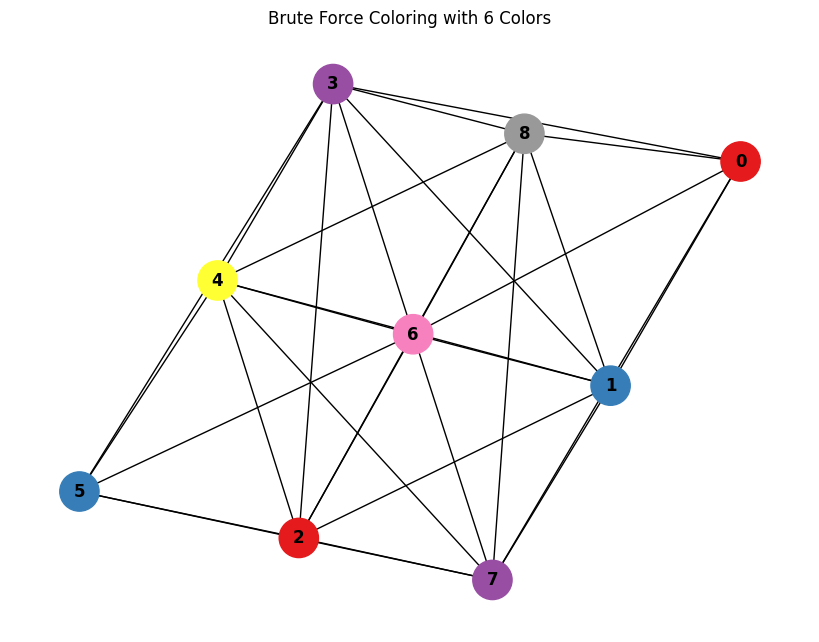

{'Version 4 Colors': 5,
 'Version 4 Time': 0.0009591579437255859,
 'Brute Force Colors': 5,
 'Brute Force Time': 1.2561242580413818,
 'Brute Force Coloring': {0: 0,
  1: 1,
  2: 2,
  3: 1,
  4: 2,
  5: 3,
  6: 4,
  7: 1,
  8: 4},
 'alog1': {'Version 4 Colors': 6,
  'algo1 colors': {0: 3, 8: 1, 7: 0, 6: 2, 5: 1, 4: 5, 3: 0, 2: 3, 1: 4},
  'Version 4 Time': 0.00046753883361816406,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.169639825820923,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 0,
   3: 2,
   4: 3,
   5: 1,
   6: 4,
   7: 2,
   8: 5}},
 'algo2': {'Version 4 Colors': 6,
  'Version 4 Time': 0.00043654441833496094,
  'Brute Force Colors': 6,
  'Brute Force Time': 9.42982029914856,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 0,
   3: 2,
   4: 3,
   5: 1,
   6: 4,
   7: 2,
   8: 5}},
 'algo3': {'Version 4 Colors': 6,
  'Version 4 Time': 0.0009729862213134766,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.660520076751709,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v5(G):
    # Step 1: Initial Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    remaining_colors = available_colors - adjacent_colors
                    if remaining_colors:
                        new_color = remaining_colors.pop()
                    else:
                        # If no color is available, assign a new color
                        new_color = len(available_colors)
                        available_colors.add(new_color)

                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.nodes:
                        if neighbor not in color_map and neighbor not in G.neighbors(current_node):
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if remaining_color:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Color Non-Adjacent Nodes with Same Neighbor Colors
    nodes_to_check = list(G.nodes)
    for node in nodes_to_check:
        if node not in color_map:
            continue
        current_color = color_map[node]
        same_neighbors = []
        for other_node in G.nodes:
            if other_node != node and other_node not in color_map:
                # Check if they have the same neighbors' colors
                neighbors = set(G.neighbors(node))
                other_neighbors = set(G.neighbors(other_node))
                if neighbors == other_neighbors:
                    same_neighbors.append(other_node)
        
        if same_neighbors:
            for same_node in same_neighbors:
                color_map[same_node] = current_color

    # Step 4: Ensure Adjacent Nodes Have Different Colors
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map.get(node) in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

# Create a test graph
#G = nx.erdos_renyi_graph(7, 0.8) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v5(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results["algo4"] = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results


Brute Force Colors: 6


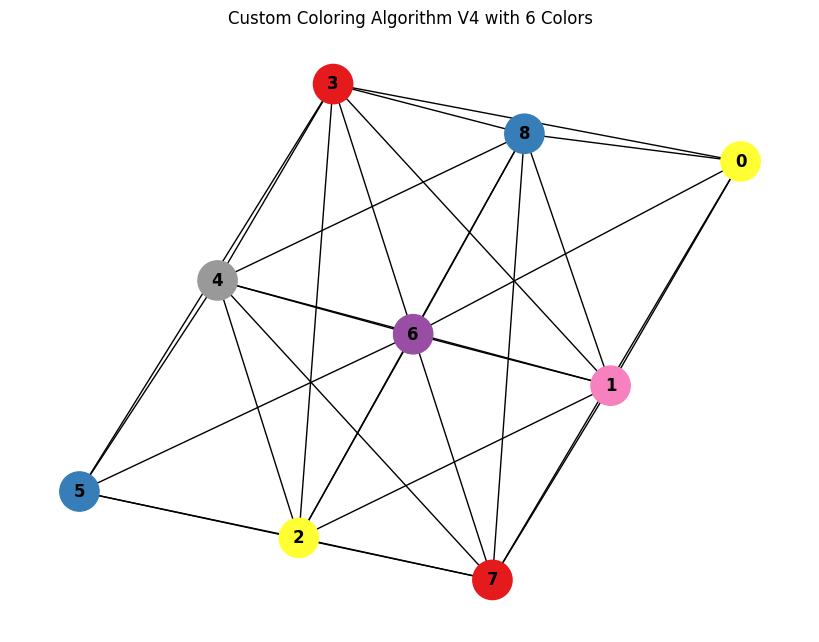

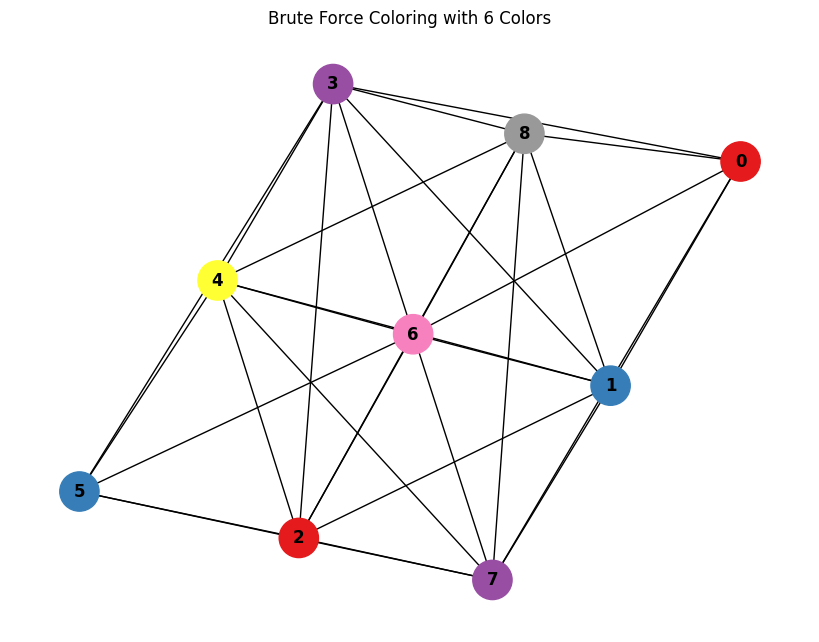

{'Version 4 Colors': 5,
 'Version 4 Time': 0.0009591579437255859,
 'Brute Force Colors': 5,
 'Brute Force Time': 1.2561242580413818,
 'Brute Force Coloring': {0: 0,
  1: 1,
  2: 2,
  3: 1,
  4: 2,
  5: 3,
  6: 4,
  7: 1,
  8: 4},
 'alog1': {'Version 4 Colors': 6,
  'algo1 colors': {0: 3, 8: 1, 7: 0, 6: 2, 5: 1, 4: 5, 3: 0, 2: 3, 1: 4},
  'Version 4 Time': 0.00046753883361816406,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.169639825820923,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 0,
   3: 2,
   4: 3,
   5: 1,
   6: 4,
   7: 2,
   8: 5}},
 'algo2': {'Version 4 Colors': 6,
  'Version 4 Time': 0.00043654441833496094,
  'Brute Force Colors': 6,
  'Brute Force Time': 9.42982029914856,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2: 0,
   3: 2,
   4: 3,
   5: 1,
   6: 4,
   7: 2,
   8: 5}},
 'algo3': {'Version 4 Colors': 6,
  'Version 4 Time': 0.0009729862213134766,
  'Brute Force Colors': 6,
  'Brute Force Time': 8.660520076751709,
  'Brute Force Coloring': {0: 0,
   1: 1,
   2

In [ ]:
def custom_coloring_algorithm_v6(G):
    # Step 1: Initial Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    remaining_colors = available_colors - adjacent_colors
                    if remaining_colors:
                        new_color = remaining_colors.pop()
                    else:
                        # If no color is available, assign a new color
                        new_color = len(available_colors)
                        available_colors.add(new_color)

                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.nodes:
                        if neighbor not in color_map and neighbor not in G.neighbors(current_node):
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if remaining_color:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Color Non-Adjacent Nodes with Same Neighbor Colors
    nodes_to_check = list(G.nodes)
    for node in nodes_to_check:
        if node not in color_map:
            continue
        current_color = color_map[node]
        same_neighbors = []
        for other_node in G.nodes:
            if other_node != node and other_node not in color_map:
                # Check if they have the same neighbors' colors
                neighbors = set(G.neighbors(node))
                other_neighbors = set(G.neighbors(other_node))
                if neighbors == other_neighbors:
                    same_neighbors.append(other_node)
        
        if same_neighbors:
            for same_node in same_neighbors:
                color_map[same_node] = current_color

    # Step 4: Ensure Adjacent Nodes Have Different Colors, with Preference to Non-Adjacent Nodes
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        non_adjacent_colors = {color_map.get(other_node) for other_node in G.nodes if other_node not in G.neighbors(node) and other_node != node}

        if color_map.get(node) in used_colors:
            # Attempt to color the node like a non-adjacent node first
            for color in non_adjacent_colors:
                if color not in used_colors:
                    color_map[node] = color
                    break
            else:
                # If no non-adjacent color is available, reassign color to avoid conflicts
                for color in range(len(used_colors) + 1):
                    if color not in used_colors:
                        color_map[node] = color
                        break

    return color_map
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v6(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results["algo5"] = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results

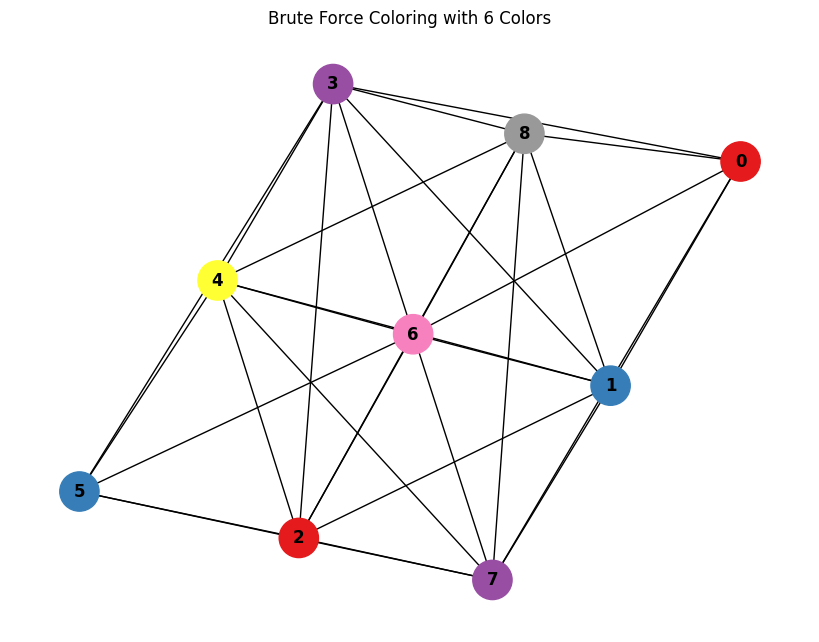

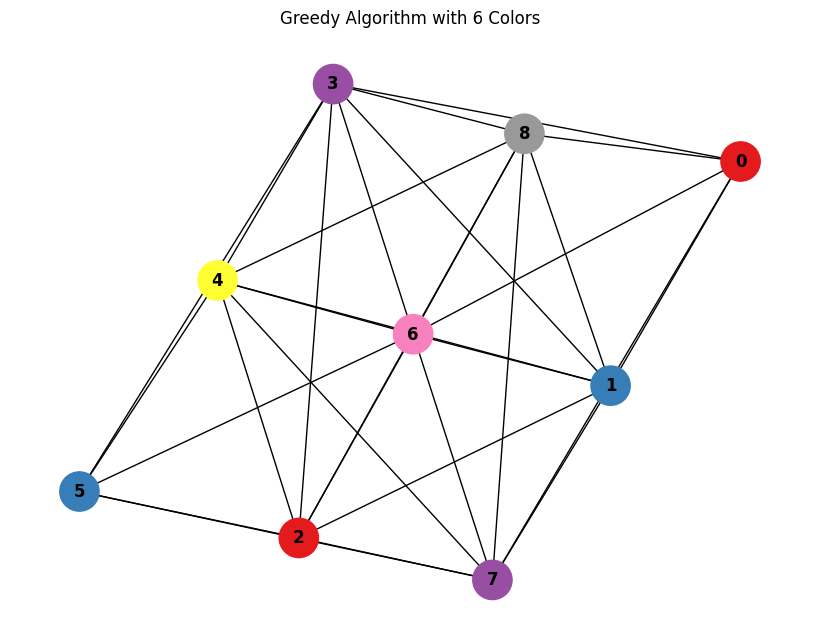

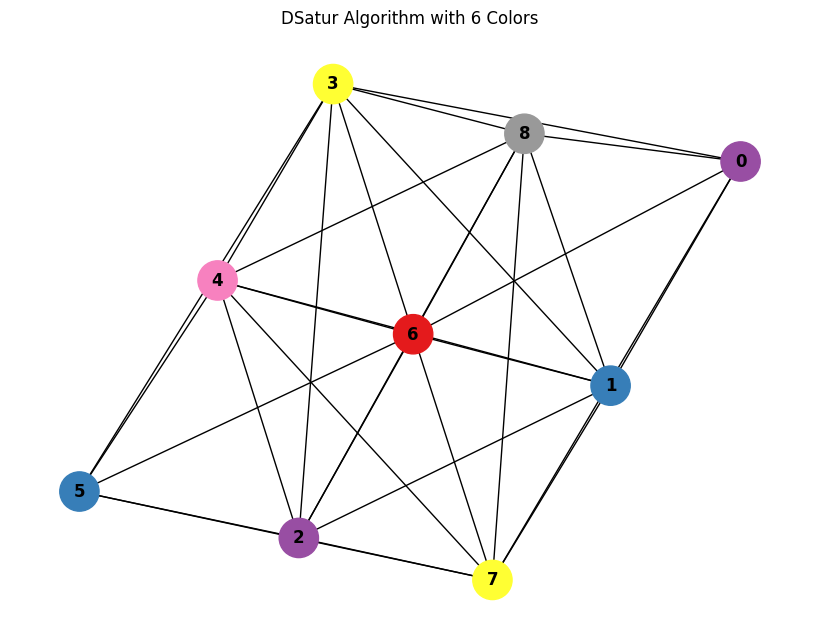

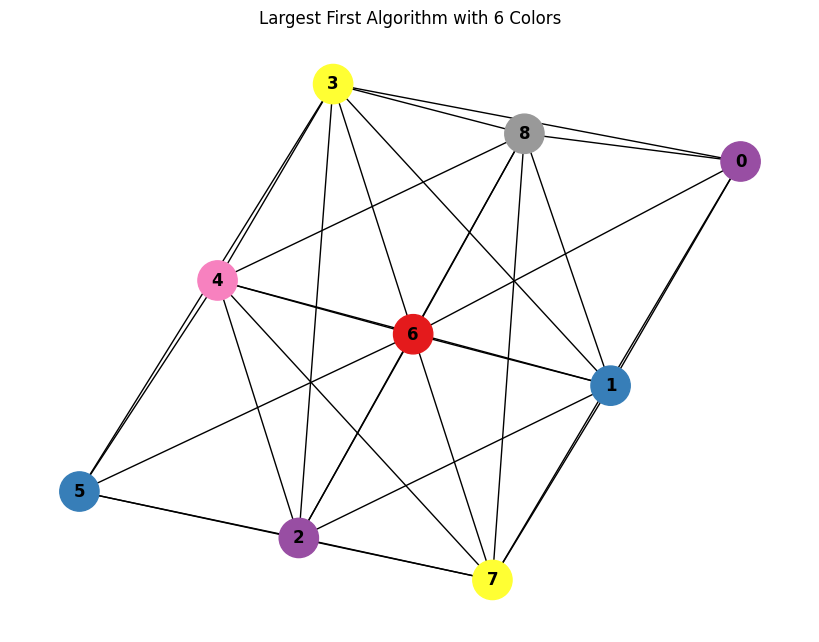

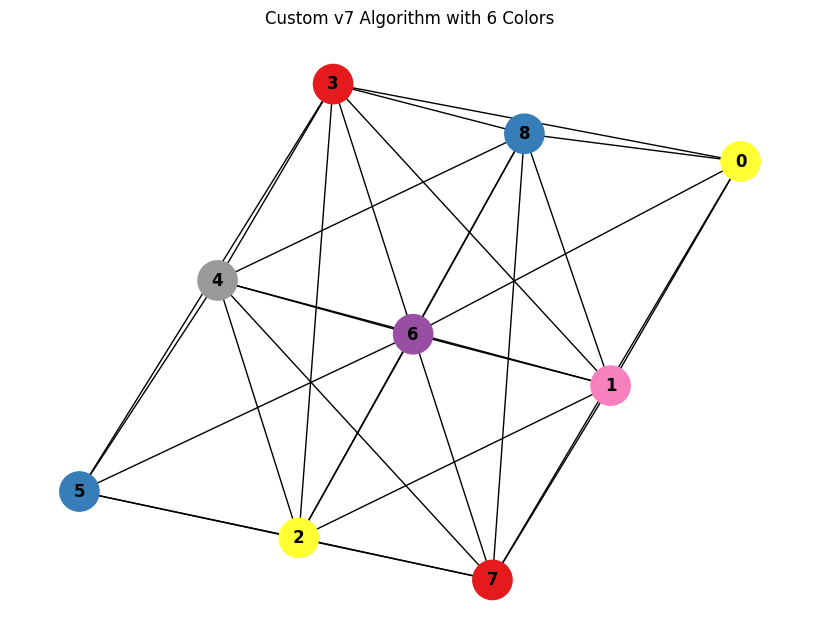

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample graph


# Define the algorithms
def greedy_coloring_algorithm(G):
    color_map = {}
    for node in G.nodes:
        adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        color = 0
        while color in adjacent_colors:
            color += 1
        color_map[node] = color
    return color_map

def dsatur_algorithm(G):
    color_map = {}
    saturation = {node: 0 for node in G.nodes}
    degrees = {node: len(list(G.neighbors(node))) for node in G.nodes}
    uncolored = set(G.nodes)

    while uncolored:
        current_node = max(uncolored, key=lambda x: (saturation[x], degrees[x]))
        uncolored.remove(current_node)
        adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
        color = 0
        while color in adjacent_colors:
            color += 1
        color_map[current_node] = color
        for neighbor in G.neighbors(current_node):
            if neighbor in uncolored:
                saturation[neighbor] += 1

    return color_map

def largest_first_coloring_algorithm(G):
    color_map = {}
    nodes_by_degree = sorted(G.nodes, key=lambda x: -len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        color = 0
        while color in adjacent_colors:
            color += 1
        color_map[node] = color

    return color_map

# Assuming your custom algorithm v7 is implemented

# Test the algorithms
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()
algorithms = {
    "Greedy": greedy_coloring_algorithm,
    "DSatur": dsatur_algorithm,
    "Largest First": largest_first_coloring_algorithm,
    "Custom v7": custom_coloring_algorithm_v6

}

pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility

for name, algo in algorithms.items():
    color_map = algo(G)
    colors = [color_map[node] for node in G.nodes]
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'{name} Algorithm with {len(set(colors))} Colors')
    plt.show()
